**Inferential Methods in Regression and Correlation**

The linear model is given by the equation

$$y = \beta_0 + \beta_1x + e,$$

where $\beta_0$ is the intercept, $\beta_1$ is the regression coefficient and $e$ the error term. The best regression line is found by applying the **ordinary least squares method,** in order to minimize the **sum of squared error (SSE);** thus, minimizing the squared difference of the measured response variable $y$ and the model prediction $\hat{y}$, which is given by

$$SSE = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y- \hat{y})^2.$$

Refer to the section on *linear regression* for more details on the linear model.

However, no matter what, we have to acknowledge that we build our models, in this case our linear regression model, on observation data. Hence the data originates from a population and its corresponding statistical properties, which are general unknown to us. Thus, by taking measurements each observation represents a manifestation of the population, denoted by the term random variable.

Let us consider an example, as shown in the figure below. In this example the population parameters are known, and thus, we may build a linear regression model of the form $y= \beta_0 + \beta_1 = 1+0.25x$.

![linear_model_pop](linear_model_pop.png)

However, if we take a random sample of the population and build a linear model based on the sample data, the sample regression line will not be the same as the population regression line. In the figure below we took four random samples of sample size $25$ (blue dots). We immediately see that the sample regression line (blue dashed line) is not the same as the population regression line (grey line). In order to account for that variability, which is due to the random sampling process, a statistic is calculated by applying the equation

$$s_e = \sqrt{\frac{SSE}{n-2}},$$

where $SSE$ corresponds to the **sum of squared error** and $n$ corresponds to the sample size. The statistic, $s_e$, is denoted as **standard error of the estimate** ($s_e$) or the **residual standard error.**

![sample_regression_line](sample_regression_line.png)

As seen above, the sample regression line varies from one sample to another and is therefore a random variable. Its distribution is called the **sampling distribution of the slope of the regression line.**

**Inferences About the Slope - The Regressioon $t$-Test**

The **regression $t$-test** is applied to test if the slope, $\beta_1$, of the population regression line equals $0$. Based on that test we may decide whether $x$ is a useful (linear) predictor of $y$.

The test statistic follows a $t$-distribution with $df=n-2$ and be written as

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}},$$

where $\beta_1$ corresponds to the sample regression coefficient and $s_e$ to **residual standard error** ($s_e=\sqrt{\frac{SSE}{n-2}}$ and $SSE = \sum_{i=1}^{n} e_i^2$).

**Interval Estimation of $\beta_1$**

The $100(1-\alpha)$% confidence interval for $\beta_1$ is given by 

$$\beta_1 \pm t_{\alpha/2} \times  \frac{s_e}{\sqrt{\sum(x- \bar x)^2}},$$

where $s_e$ corresponds to the **residual standard error** (also known as the **standard error of the estimate**).

The value of $t$ is obtained from the $t$-distribution for the given confidence level and $n-2$ degrees of freedom.

**The Regression $t$-Test: An Example**

In order to practice the correlation **regression $t$-test** we load the *students* data set. 

In [1]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showcase the regression $t$-test we examine the relationship between two variables, the height of students, as the predictor variable and the weight of students as response variable. **The question is, whether the predictor variable *height* is useful for making predictions about the *weight* of students?**

**Data Preparation**

For data preparation we randomly sample $12$ students from the data set and build a data frame with the two variables of interest (*height* and *weight*). Further we plot the data in form of a scatter plot to visualize the underlying linear relationship between the two variables.

In [2]:
sample = students_df.sample(n=12)

In [3]:
data = sample[['height', 'weight']]

data

,height,weight
4465,171,70.7
5436,177,74.7
1730,172,73.1
7192,156,64.2
3301,176,76.6
233,179,80.2
2786,183,83.0
6370,168,71.1
7816,184,87.3
1418,172,73.7


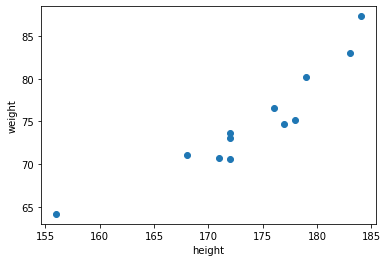

In [9]:
import matplotlib.pyplot as plt

plt.scatter(data['height'],data['weight'])
plt.xlabel('height')
plt.ylabel('weight')

pass

The visual inspection confirms our assumption that the relationship between the height and the weight variable is roughly linear. In other words, with increasing height the individual student tends to have a higher weight.

**Hypothesis testing**

In order to conduct the **regression $t$-test** we follow the step-wise implementation procedure for hypothesis testing. The **regression $t$-test** follows the same step-wise procedure as discussed in the previous sections.

\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the p-value.} \\
\ \text{Step 5} & \text{If } p \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis  $H_A$**

The null hypothesis states that there is no linear relationship between the height and the weight of the individuals in the *students* data set.

$$H_0: \beta_1  = 0\text{ (predictor variable is not useful for making predictions)}$$

**Alternative hypothesis**

$$H_A: \beta_1  \ne 0\text{ (predictor variable is useful for making predictions)}$$

**Step 2: Decide on the significance level, $\alpha$**

$$\alpha = 0.01$$

In [10]:
alpha = 0.01

**Step 3 and 4: Compute the value of the test statistic and the $p$-value.**

For illustration purposes we manually compute the test statistic in Python. Recall the equation form above.

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}}$$

where $\beta_1 = \frac{\text{cov}(x,y)}{\text{var}(x)}$, and

$$s_e = \sqrt{\frac{SSE}{n-2}},$$

where $SSE = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y - \hat y)^2$. The test statistic follows a $t$-distribution with $df=n-2$. In order to calculate $\hat y = \beta_0+\beta_1x$ we need to know $\beta_0$, which is calculated as $\beta_0 = \bar{y} - \beta_1 \bar{x}$.


In order not to get confused by the different computational steps we do one step after another.

- Build the linear model by calculating the intercept $(\beta_0)$ and the regression coefficient $(\beta_1)$.

In [17]:
import numpy as np

y_bar = np.mean(data['weight'])
x_bar = np.mean(data['height'])

# linear model

cov = np.cov(data['height'], data['weight'])[0][1]

beta1 = cov/np.var(data['height'],ddof=1)

beta1

0.762987012987013

In [19]:
beta0 = y_bar - beta1 * x_bar
beta0

-57.72640692640691

- Calculate the sum of squared errors $(SSE)$ and the residual standard error $(s_e)$.

In [29]:
# sum of squared errors SSE

y_hat = beta0 + beta1* data['height']

SSE = np.sum((data['weight']-y_hat)**2)

SSE

61.40277056277051

In [30]:
# Residual standard error

import math 

se = math.sqrt(SSE/10) # n=12, n-2 =10
se

2.47795824344904

- Compute the value of the test statistic

In [33]:
# compute the value of the test statistic

t_statistic = beta1/(se/(math.sqrt(np.sum((data['height']-x_bar)**2))))
t_statistic

7.642114109331592

In [35]:
# compute the df

df = 10 # 12-2=10

# compute the p-value, two-sided test

from scipy.stats import t

p_upper = 1- t.cdf(t_statistic, df=df)
p_lower = t.cdf(-t_statistic, df=df)

p = p_upper + p_lower

p


1.754112990440826e-05

In [27]:
from scipy.stats import linregress

linregress(data['height'],data['weight'])

LinregressResult(slope=0.762987012987013, intercept=-57.72640692640691, rvalue=0.9240158265869266, pvalue=1.754112990444171e-05, stderr=0.09983978282336155)

**Step 5: If $p \leq \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

The $p$-value is less than the specified significance level of $0.01$; we reject $H_0$. The test results are statistically significant at the $1$% level and provide very strong evidence against the null hypothesis.

**Step 6: Interpret the result of the hypothesis test.**

$p=1.754112990440826 \times 10^{-5}$. At the $1$% significance level, the data provides very strong evidence to conclude that the height variable is a good estimator for the weight of students.